<a href="https://colab.research.google.com/github/s34836/WUM/blob/main/Lab_07_Convolutional_Networks_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 07 - Convolutional Networks 2

1. Load the Cats&Dogs dataset using the `ImageDataGenerator`. Create a convolutional network to classify it. Compare several models with different architectures. Plot the learning curve for each model.
2. Train a selected model using data augmentation. You can do this by setting the appropriate options in the `ImageDataGenerator`, or by adding augmentation layer to your network, for example: `RandomZoom`, `RandomRotation`, `RandomFlip`, etc. See: https://keras.io/api/layers/preprocessing_layers/image_augmentation/.

In [1]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip -q cats_and_dogs_filtered.zip

--2025-11-14 11:37:27--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.188.207, 173.194.202.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   147MB/s    in 0.4s    

2025-11-14 11:37:27 (147 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import tensorflow as tf

image_size = (224, 224)
batch_size = 32

# ImageDataGenerator BEZ validation_split (bo mamy osobne foldery)
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

# wskazujemy poprawne ścieżki:
train = data_generator.flow_from_directory(
    "cats_and_dogs_filtered/train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

valid = data_generator.flow_from_directory(
    "cats_and_dogs_filtered/validation",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
import tensorflow as tf
image_size = (224, 224)
batch_size = 32

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, validation_split=0.2)

train = data_generator.flow_from_directory(
    "kagglecatsanddogs_5340/PetImages",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

valid = data_generator.flow_from_directory(
    "kagglecatsanddogs_5340/PetImages",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')

FileNotFoundError: [Errno 2] No such file or directory: 'kagglecatsanddogs_5340/PetImages'

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.

===== Training model_1_simple =====
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.4906 - loss: 4.0241 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.4998 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5097 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931

===== Training model_2_medium =====
Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - accuracy: 0.5317 - loss: 1.5465 - val_accuracy: 0.5890 - val_loss: 0.6653
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.6538 - loss: 0.6427 - val_accuracy: 0.6450 - val_loss: 0.6409
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.7606 - loss: 0.5037 - 

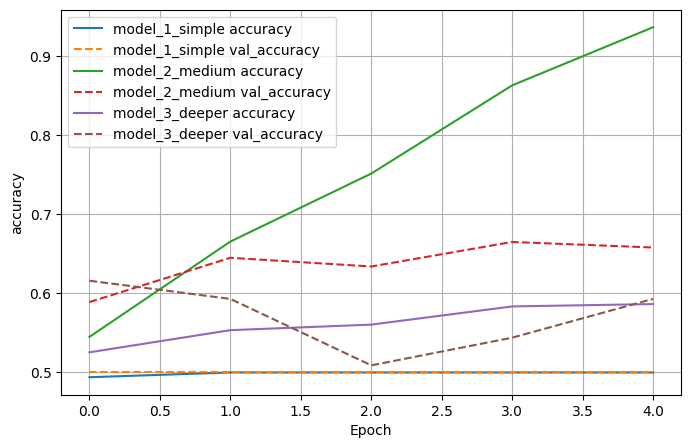

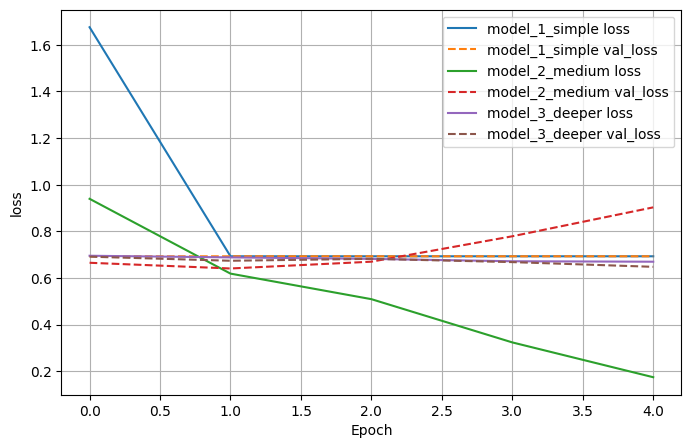

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Podstawowe parametry
image_size = (224, 224)
batch_size = 32

# 1. Generatory danych
# validation_split usuwamy, bo mamy osobne foldery train/validation
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

train = data_generator.flow_from_directory(
    "cats_and_dogs_filtered/train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

valid = data_generator.flow_from_directory(
    "cats_and_dogs_filtered/validation",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# 2. Definicje kilku prostych modeli CNN

def build_model_1():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(*image_size, 3)),
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


def build_model_2():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(*image_size, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


def build_model_3():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(*image_size, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


models = {
    "model_1_simple": build_model_1(),
    "model_2_medium": build_model_2(),
    "model_3_deeper": build_model_3()
}

# 3. Trening modeli
epochs = 5
histories = {}

for name, model in models.items():
    print(f"\n===== Training {name} =====")
    history = model.fit(
        train,
        epochs=epochs,
        validation_data=valid,
        verbose=1
    )
    histories[name] = history

# 4. Funkcja do rysowania learning curves

def plot_history(histories, metric):
    plt.figure(figsize=(8, 5))
    for name, history in histories.items():
        plt.plot(history.history[metric], label=f'{name} {metric}')
        plt.plot(history.history['val_' + metric], linestyle='--', label=f'{name} val_{metric}')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

# 5. Wykresy dla accuracy i loss
plot_history(histories, 'accuracy')
plot_history(histories, 'loss')

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,889 (429.25 KB)

 Trainable params: 109,889 (429.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.5131 - loss: 0.6974 - val_accuracy: 0.6080 - val_loss: 0.6927
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.5113 - loss: 0.6930 - val_accuracy: 0.6060 - val_loss: 0.6916
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.5065 - loss: 0.6931 - val_accuracy: 0.5950 - val_loss: 0.6898
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.5415 - loss: 0.6897 - val_accuracy: 0.5650 - val_loss: 0.6835
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.5646 - loss: 0.6819 - val_accuracy: 0.5250 - val_loss: 0.6822


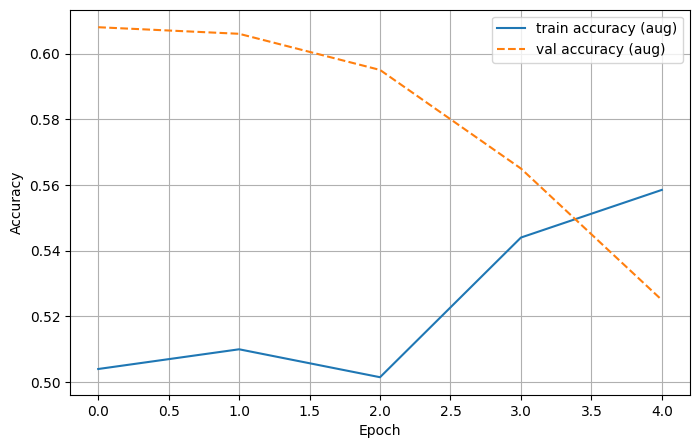

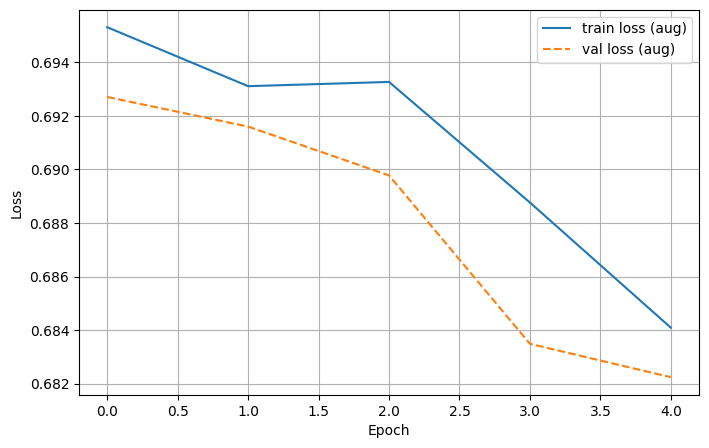

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

image_size = (224, 224)

# 1. Warstwy augmentacji obrazu
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

# 2. Model bazowy + augmentacja
def build_model_with_augmentation():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(*image_size, 3)),

        # augmentacja stosowana tylko w trybie training
        data_augmentation,

        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

model_aug = build_model_with_augmentation()
model_aug.summary()

# 3. Trening modelu z augmentacją
epochs = 5

history_aug = model_aug.fit(
    train,                       # <-- dane treningowe (generator)
    validation_data=valid,       # <-- dane walidacyjne (generator)
    epochs=epochs,
    verbose=1
)

# 4. Wykres accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_aug.history['accuracy'], label='train accuracy (aug)')
plt.plot(history_aug.history['val_accuracy'], label='val accuracy (aug)', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 5. Wykres loss
plt.figure(figsize=(8, 5))
plt.plot(history_aug.history['loss'], label='train loss (aug)')
plt.plot(history_aug.history['val_loss'], label='val loss (aug)', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()